In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [75]:
# export dataframe
def export_df_to_csv(df: pd.DataFrame, filename: str):
    df.to_csv("../data/" + filename, index=False)

In [76]:
# prepare new data for hypothesis testing
def add_to_classifier_df(df: pd.DataFrame, classifier_name: str, prediction_results: np.array):
    df[classifier_name] = prediction_results

## APPROACH 1: Predict rank OF top 200 chart FROM viral 50 rank

The goal of predicting the rank of the top 200 chart from the viral 50 rank is to use the popularity of a song on the viral chart as a means of predicting how well it will perform on the overall top 200 chart.

In [77]:
df_weekly_ranks = pd.read_csv("../data/viral50_to_top200.csv")
df_weekly_ranks.sample(10)

,title,date_viral,viral_50_rank,date_top200,top_200_rank
564,For The Night (feat. Lil Baby & DaBaby),2020-08-23,40,2020-08-30,5
908,Opp Stoppa (feat. 21 Savage),2021-02-21,32,2021-02-28,45
23,Suicidal,2020-01-05,13,2020-01-12,12
1215,Beggin',2021-07-18,2,2021-07-25,5
146,You should be sad,2020-02-16,36,2020-02-23,35
1366,Life Goes On,2021-10-03,11,2021-10-10,31
1311,Over The Top (feat. Drake),2021-09-05,40,2021-09-12,163
178,Sunday Best,2020-03-01,15,2020-03-08,31
1365,Knife Talk (with 21 Savage ft. Project Pat),2021-10-03,35,2021-10-10,3
320,death bed (coffee for your head),2020-04-19,12,2020-04-26,17


In [78]:
df_classifier_approach_1 = pd.DataFrame()

In [79]:
xtrain_1, xtest_1, ytrain_1, ytest_1 = train_test_split(df_weekly_ranks[["viral_50_rank"]],df_weekly_ranks[["top_200_rank"]], train_size=0.8)

In [80]:
# add truth values to dataframe
add_to_classifier_df(df_classifier_approach_1, 'truth', ytest_1)

### We are using SVM with a linear SVC to predict the rank of the top 200 chart based on the viral 50 rank.

In [81]:
# test with svm
svm_linear_1 = SVC(kernel='linear')

svm_fit_linear_1 = svm_linear_1.fit(xtrain_1, ytrain_1)
ypred_svm_linear_1 = svm_fit_linear_1.predict(xtest_1)

/Users/david/.local/share/virtualenvs/data_science-5TF-S9g6/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
add_to_classifier_df(df_classifier_approach_1, "svc_linear", ypred_svm_linear_1)

In [83]:
print(f'accuracy of support vector machines with linear kernel is: {accuracy_score(ypred_svm_linear_1, ytest_1)}')
print(f'r^2 score of support vector machines with linear kernel is: {svm_fit_linear_1.score(xtrain_1, ytrain_1)}')

accuracy of support vector machines with linear kernel is: 0.025806451612903226
r^2 score of support vector machines with linear kernel is: 0.025080906148867314


### We are using Support Vector Machine (SVM) with a polynomial kernel (SVC = poly) to predict the rank of the top 200 chart from the viral 50 rank.

In [84]:
svm_poly_1 = SVC(kernel='poly')

svm_fit_poly_1 = svm_poly_1.fit(xtrain_1, ytrain_1)
ypred_svm_poly_1 = svm_fit_poly_1.predict(xtest_1)

/Users/david/.local/share/virtualenvs/data_science-5TF-S9g6/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
add_to_classifier_df(df_classifier_approach_1, "svc_poly", ypred_svm_poly_1)

In [86]:
print(f'accuracy of support vector machines with polynomial kernel is: {accuracy_score(ypred_svm_poly_1, ytest_1)}')
print(f'r^2 score of support vector machines with polynomial kernel is: {svm_fit_poly_1.score(xtrain_1, ytrain_1)}')

accuracy of support vector machines with polynomial kernel is: 0.03225806451612903
r^2 score of support vector machines with polynomial kernel is: 0.02750809061488673


### Test polynomial rergression because we do not have a linear correlation between our features

In [87]:
# create polynomial regression model
poly_degree = 3
polyn_reg_1 = make_pipeline(PolynomialFeatures(poly_degree), LinearRegression())

polyn_reg = polyn_reg_1.fit(xtrain_1, ytrain_1)
ypred_poly_reg_1 = polyn_reg.predict(xtest_1)

In [88]:
add_to_classifier_df(df_classifier_approach_1, "poly_reg", ypred_poly_reg_1)

In [89]:
# R² score for training data
polyn_reg.score(xtrain_1, ytrain_1)

0.004204694994813463

In [90]:
export_df_to_csv(df_classifier_approach_1, "classification_results_approach_1.csv")

## Approach 2 (extension of Appr. 1): Predict rank OF top 200 chart FROM viral 50 trend and rank
We try to predict the rank of the top 200 chart from the viral 50 trend and rank to gain insight into which songs are likely to rise in popularity.

In [91]:
df_weekly_ranks_with_trend = pd.read_csv("../data/viral50_and_trend_to_top200.csv")
df_weekly_ranks_with_trend.sample(10)

,title,date_viral,viral_50_rank,trend_viral_50,date_top200,top_200_rank
691,Sofia,2020-10-11,23,MOVE_DOWN,2020-10-18,29
1117,WHOLE LOTTA MONEY,2021-05-23,20,MOVE_DOWN,2021-05-30,90
1013,Astronaut In The Ocean,2021-04-11,18,SAME_POSITION,2021-04-18,8
467,Roses - Imanbek Remix,2020-07-05,48,SAME_POSITION,2020-07-12,29
159,Say So,2020-02-23,36,SAME_POSITION,2020-03-01,2
541,The Woo (feat. 50 Cent & Roddy Ricch),2020-08-09,41,MOVE_UP,2020-08-16,16
1510,Heather,2021-12-05,41,MOVE_UP,2021-12-12,149
646,Blastoff (feat. Juice Wrld & Trippie Redd),2020-09-27,32,MOVE_UP,2020-10-04,99
90,SUGAR,2020-01-26,16,MOVE_DOWN,2020-02-02,23
862,Heat Waves,2021-01-31,41,MOVE_DOWN,2021-02-07,25


In [92]:
df_classifier_approach_2 = pd.DataFrame()

In [93]:
xtrain_2, xtest_2, ytrain_2, ytest_2 = train_test_split(df_weekly_ranks_with_trend[["viral_50_rank", "trend_viral_50"]], df_weekly_ranks_with_trend["top_200_rank"], train_size=0.8)

In [94]:
# add truth values to dataframe
add_to_classifier_df(df_classifier_approach_2, 'truth', ytest_2)

### We are using SVM with a linear SVC to predict the rank of the top 200 chart based on the viral 50 trend and rank.

In [95]:
svm_linear_2 = Pipeline([('ohe', OneHotEncoder()), ('clf', SVC(kernel='linear'))])

svm_fit_linear_2 = svm_linear_2.fit(xtrain_2, ytrain_2)
ypred_svm_linear_2 = svm_fit_linear_2.predict(xtest_2)

In [96]:
add_to_classifier_df(df_classifier_approach_2, 'svc_linear', ypred_svm_linear_2)

In [97]:
print(f'accuracy of support vector machines with linear kernel is: {accuracy_score(ypred_svm_linear_2, ytest_2)}')
print(f'r^2 score of support vector machines with linear kernel is: {svm_fit_linear_2.score(xtrain_2, ytrain_2)}')

accuracy of support vector machines with linear kernel is: 0.00967741935483871
r^2 score of support vector machines with linear kernel is: 0.10679611650485436


### We are using Support Vector Machine (SVM) to predict our results, with the radial basis function (rbf) kernel in the Support Vector Classifier (SVC) algorithm.

In [98]:
svm_linear_poly_2 = Pipeline([('ohe', OneHotEncoder()), ('clf', SVC(kernel='rbf'))])

svm_fit_poly_2 = svm_linear_poly_2.fit(xtrain_2, ytrain_2)
ypred_svm_poly_2 = svm_fit_poly_2.predict(xtest_2)

In [99]:
add_to_classifier_df(df_classifier_approach_2, 'svc_rbf', ypred_svm_poly_2)

In [100]:
print(f'accuracy of support vector machines with polynomial kernel is: {accuracy_score(ypred_svm_poly_2, ytest_2)}')
print(f'r^2 score of support vector machines with polynomial kernel is: {svm_fit_poly_2.score(xtrain_2, ytrain_2)}')

accuracy of support vector machines with polynomial kernel is: 0.016129032258064516
r^2 score of support vector machines with polynomial kernel is: 0.11812297734627832


In [101]:
export_df_to_csv(df_classifier_approach_2, "classification_results_approach_2.csv")

## Approach 3: Predict trend  OF  top 200  FROM  viral 50 chart position
We try to predict the trend of the top 200 songs by analyzing their position on the Viral 50 chart. By monitoring changes in popularity and engagement, we can anticipate which songs will rise to the top and which will fall out of favor.

In [102]:
def choose_freq_for_classification(freq):
    if freq == 1:
        return pd.read_csv('../data/daily_ranks_top_200.csv')
    elif freq == 3:
        return pd.read_csv('../data/3_days_ranks_top_200.csv')
    elif freq == 7:
        return pd.read_csv('../data/weekly_ranks_top_200.csv')
    else:
        print('Wrong input, taking weekly granularity!')
        return pd.read_csv('../data/weekly_ranks_top_200.csv')

In [103]:
df_trends_top_200 = choose_freq_for_classification(7)
df_trends_top_200

,title,date_viral,viral_50_rank,date_top200,top_200_rank,trend_top_200
0,Adore You,2020-01-05,10,2020-01-12,18,MOVE_UP
1,"All I Want - From ""High School Musical: The Mu...",2020-01-05,2,2020-01-12,66,MOVE_UP
2,Ayy Macarena,2020-01-05,20,2020-01-12,143,MOVE_UP
3,Ballin' (with Roddy Ricch),2020-01-05,38,2020-01-12,13,SAME_POSITION
4,Blinding Lights,2020-01-05,12,2020-01-12,15,MOVE_UP
...,...,...,...,...,...,...
1541,SAD GIRLZ LUV MONEY Remix (feat. Kali Uchis an...,2021-12-19,47,2021-12-26,166,NEW_ENTRY
1542,Super Gremlin,2021-12-19,23,2021-12-26,6,MOVE_UP
1543,Surface Pressure,2021-12-19,6,2021-12-26,62,NEW_ENTRY
1544,We Don't Talk About Bruno,2021-12-19,1,2021-12-26,27,NEW_ENTRY


We can look at the distribution of our category data to see any class inbalance.

Text(0, 0.5, 'Occurances')

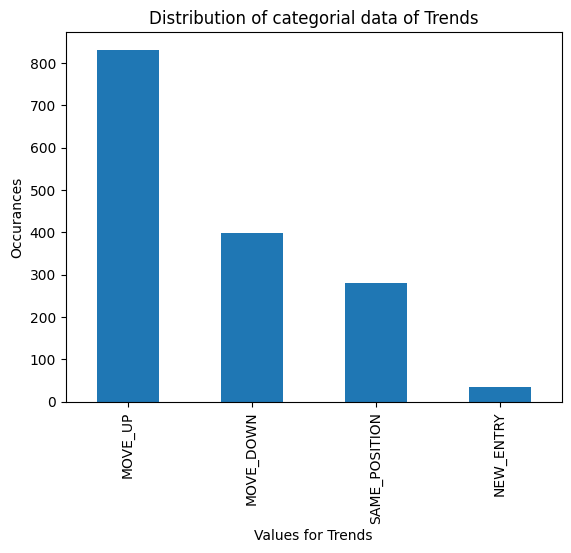

In [104]:
df_trends_top_200.trend_top_200.value_counts().plot(kind="bar")
plt.xlabel('Values for Trends')
plt.title('Distribution of categorial data of Trends')
plt.ylabel('Occurances')

As we can see, we have some imbalance, which might result in some bad results in our prediction.

In [105]:
df_classifier_approach_3 = pd.DataFrame()

In [106]:
xtrain_3, xtest_3, ytrain_3, ytest_3 = train_test_split(df_trends_top_200[["viral_50_rank"]], df_trends_top_200["trend_top_200"], train_size=0.8)

In [107]:
# add truth value for test classifier results
add_to_classifier_df(df_classifier_approach_3, 'truth', ytest_3)

### We are using a support vector machine with a linear kernel to predict the trend of the top 200 songs on the Viral 50 chart.

In [108]:
svm_linear_3 = SVC(kernel='linear')

svm_fit_linear_3 = svm_linear_3.fit(xtrain_3, ytrain_3)
ypred_svm_linear_3 = svm_fit_linear_3.predict(xtest_3)

In [109]:
add_to_classifier_df(df_classifier_approach_3, 'svc_linear', ypred_svm_linear_3)

In [110]:
print(f'accuracy of support vector machines with linear kernel is: {accuracy_score(ypred_svm_linear_3, ytest_3)}')
print(f'r^2 score of support vector machines with linear kernel is: {svm_fit_linear_3.score(xtrain_3, ytrain_3)}')

accuracy of support vector machines with linear kernel is: 0.5516129032258065
r^2 score of support vector machines with linear kernel is: 0.5339805825242718


### We are using a Support Vector Machine (SVM) algorithm with a polynomial kernal to predict the trend of the top 200 songs on the Viral 50 chart.

In [111]:
svm_poly_3 = SVC(kernel='poly', degree=3)

svm_fit_poly_3 = svm_poly_3.fit(xtrain_3, ytrain_3)
ypred_svm_poly_3 = svm_fit_poly_3.predict(xtest_3)

add_to_classifier_df(df_classifier_approach_3, 'svc_poly', ypred_svm_poly_3)

In [112]:
print(f'accuracy of support vector machines with poly kernel is: {accuracy_score(ypred_svm_poly_3, ytest_3)}')
print(f'r^2 score of support vector machines with poly kernel is: {svm_fit_poly_3.score(xtrain_3, ytrain_3)}')

accuracy of support vector machines with poly kernel is: 0.5516129032258065
r^2 score of support vector machines with poly kernel is: 0.5339805825242718


### We are using logistic regression to predict the trend of the top 200 songs on the Viral 50 chart.

In [113]:
log_reg_3 = LogisticRegression()

log_reg_fit_3 = log_reg_3.fit(xtrain_3, ytrain_3)
ypred_log_reg_3 = log_reg_fit_3.predict(xtest_3)

add_to_classifier_df(df_classifier_approach_3, 'logistic_regression', ypred_log_reg_3)

In [114]:
print(f'accuracy of logistic regression is: {accuracy_score(ypred_log_reg_3, ytest_3)}')
print(f'r^2 score of logistic regression is: {log_reg_fit_3.score(xtrain_3, ytrain_3)}')

accuracy of logistic regression is: 0.5516129032258065
r^2 score of logistic regression is: 0.5339805825242718


### We are using K nearest neighbors algorithm to predict the trend of the top 200 songs on the Viral 50 chart.

In [115]:
knn_3 = KNeighborsClassifier()

knn_fit_3 = knn_3.fit(xtrain_3, ytrain_3)
ypred_knn_3 = knn_fit_3.predict(xtest_3)

add_to_classifier_df(df_classifier_approach_3, 'k_nearest_neighbour', ypred_knn_3)

In [116]:
print(f'accuracy of knn is: {accuracy_score(ypred_knn_3, ytest_3)}')
print(f'r^2 score of knn is: {knn_fit_3.score(xtrain_3, ytrain_3)}')

accuracy of knn is: 0.5064516129032258
r^2 score of knn is: 0.4911003236245955


In [117]:
export_df_to_csv(df_classifier_approach_3, "classification_results_approach_3.csv")